<a href="https://colab.research.google.com/github/XavierCarrera/practical-machine-learning/blob/main/Logistic_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

# Linear Regression

In [12]:
df = pd.read_csv("salarios_dc1975e5-393f-4b89-9b04-a2b48ce17388.csv")

In [13]:
df.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [15]:
df.shape

(30, 2)

In [16]:
x = df.iloc[:,:-1].values
y = df.iloc[:, 1].values

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

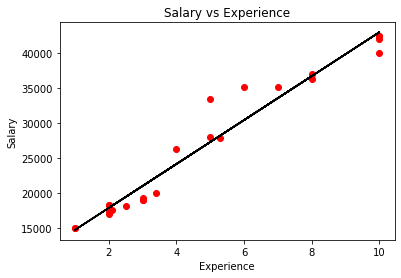

In [21]:
viz_train = plt
viz_train.scatter(X_train, Y_train, color = "red")
viz_train.plot(X_train, regressor.predict(X_train), color = "black")
viz_train.title("Salary vs Experience")
viz_train.xlabel("Experience")
viz_train.ylabel("Salary")
viz_train.show()

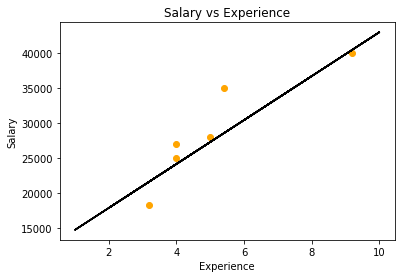

In [23]:
viz_train = plt
viz_train.scatter(X_test, Y_test, color = "orange")
viz_train.plot(X_train, regressor.predict(X_train), color = "black")
viz_train.title("Salary vs Experience")
viz_train.xlabel("Experience")
viz_train.ylabel("Salary")
viz_train.show()

In [25]:
regressor.score(X_test, Y_test)

0.7862437374732997

In [31]:
countries = ['VZ','MX','CO','BR','AR','US']
new_column = [countries[np.random.randint(0,len(paises))] for i in range(30) ]
df['Country'] = new_column
df['NormCountry'] = pd.factorize(df['Country'])[0]
x = df[['Aexperiencia','NormCountry']]
y = df['Salario']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.6, random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9370268696009337

Text(0.5, 0, '$Salaries$')

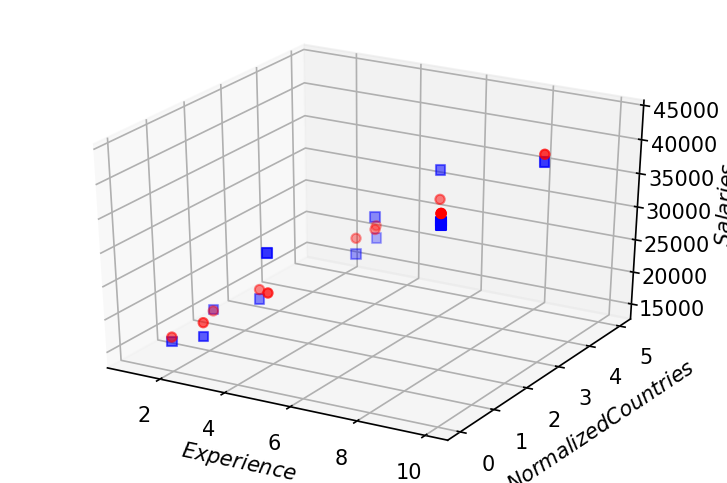

In [32]:
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Aexperiencia'],X_train['NormCountry'],y_train,c='b',marker='s')
ax.scatter(X_train['Aexperiencia'],X_train['NormCountry'],regressor.predict(X_train),c='r',marker='o')
ax.set_xlabel('$Experience$')
ax.set_ylabel('$Normalized Countries$')
ax.set_zlabel('$Salaries$')

# Logistic Regression

In [36]:
diabetes = pd.read_csv("diabetes_e5df1a05-5634-44ce-91df-7bc6143aa93e.csv")
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
diabetes.shape

(768, 9)

In [38]:
feature_cols = ["Pregnancies", "Insulin", "BMI", "Age", "Glucose", "BloodPressure", "DiabetesPedigreeFunction"]
x = diabetes[feature_cols]
y = diabetes.Outcome

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [42]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Prediction Label')

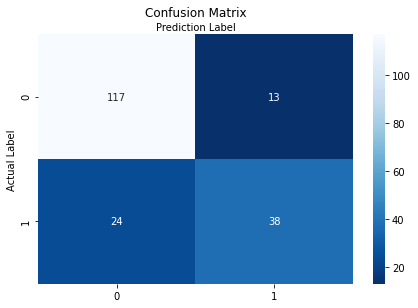

In [45]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "Blues_r", fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Actual Label")
plt.xlabel("Prediction Label")

In [46]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8072916666666666
